# Classification

In [2]:
import sys
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import  DataLoader

from tqdm import tqdm
from sklearn.metrics import accuracy_score

### Configuration

In [35]:
sys.path.append('..')  # Replace '..' with the actual path to the parent directory containing 'src'.

# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")

print(device)

cuda


In [36]:
from objects.dataset import CustomDataset, McGillDataset
from objects.utils import split_dataset_1, split_dataset
from objects.models import Classifier

In [37]:
# Example usage:
root_directory = '../2d_data'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

custom_dataset = CustomDataset(root_directory, transform=transform)

train_set, test_set = split_dataset_1(custom_dataset, test_size=0.2)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [38]:
# Initialize the classifier
num_classes = len(custom_dataset.classes)
classifier = Classifier(num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Set the number of training epochs
num_epochs = 10

/home/yannt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yannt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
# Lists to store training and test loss, and training and test accuracy values
train_loss_values = []
train_accuracy_values = []
test_loss_values = []
test_accuracy_values = []

# Training and testing loop
for epoch in range(num_epochs):
    # Training phase
    classifier.train()  # Set the model to training mode
    running_loss = 0.0
    predictions = []
    true_labels = []

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
      
        optimizer.zero_grad()  # Zero the gradients
        outputs = classifier(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

    # Calculate training accuracy
    train_accuracy = accuracy_score(true_labels, predictions)

    # Store training loss and accuracy values
    train_loss_values.append(running_loss / len(train_loader))
    train_accuracy_values.append(train_accuracy)

    # Print training loss and accuracy for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss_values[-1]}, Training Accuracy: {train_accuracy * 100:.2f}%")

    # Testing phase
    classifier.eval()  # Set the model to evaluation mode
    test_running_loss = 0.0
    test_predictions = []
    test_true_labels = []

    
    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            images, labels = images.to(device), labels.to(device)
            outputs = classifier(images)
            test_loss = criterion(outputs, labels)
            test_running_loss += test_loss.item()

            _, predicted = torch.max(outputs.data, 1)
            test_predictions.extend(predicted.cpu().numpy())
            test_true_labels.extend(labels.cpu().numpy())

    # Calculate test accuracy
    test_accuracy = accuracy_score(test_true_labels, test_predictions)

    # Store test loss and accuracy values
    test_loss_values.append(test_running_loss / len(test_loader))
    test_accuracy_values.append(test_accuracy)

    # Print test loss and accuracy for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {test_loss_values[-1]}, Test Accuracy: {test_accuracy * 100:.2f}%")

100%|██████████| 230/230 [00:41<00:00,  5.55it/s]


Epoch 1/10, Training Loss: 0.5927587711616703, Training Accuracy: 79.28%


100%|██████████| 58/58 [00:06<00:00,  8.65it/s]


Epoch 1/10, Test Loss: 0.43220953823163594, Test Accuracy: 84.97%


100%|██████████| 230/230 [00:41<00:00,  5.52it/s]


Epoch 2/10, Training Loss: 0.29653765147794847, Training Accuracy: 89.94%


100%|██████████| 58/58 [00:06<00:00,  8.31it/s]


Epoch 2/10, Test Loss: 0.3347222337435032, Test Accuracy: 87.85%


100%|██████████| 230/230 [00:41<00:00,  5.60it/s]


Epoch 3/10, Training Loss: 0.19568726968668076, Training Accuracy: 93.21%


100%|██████████| 58/58 [00:06<00:00,  8.95it/s]


Epoch 3/10, Test Loss: 0.320909527355227, Test Accuracy: 89.60%


100%|██████████| 230/230 [00:40<00:00,  5.69it/s]


Epoch 4/10, Training Loss: 0.1273981110719235, Training Accuracy: 95.32%


100%|██████████| 58/58 [00:06<00:00,  9.04it/s]


Epoch 4/10, Test Loss: 0.36576636906327875, Test Accuracy: 88.67%


100%|██████████| 230/230 [00:41<00:00,  5.50it/s]


Epoch 5/10, Training Loss: 0.11539927360237293, Training Accuracy: 95.92%


100%|██████████| 58/58 [00:07<00:00,  7.96it/s]


Epoch 5/10, Test Loss: 0.36165907233953476, Test Accuracy: 87.15%


100%|██████████| 230/230 [00:41<00:00,  5.56it/s]


Epoch 6/10, Training Loss: 0.0882396494888741, Training Accuracy: 96.98%


100%|██████████| 58/58 [00:06<00:00,  9.21it/s]


Epoch 6/10, Test Loss: 0.2907929394779534, Test Accuracy: 90.20%


100%|██████████| 230/230 [01:20<00:00,  2.86it/s]


Epoch 7/10, Training Loss: 0.07497999234195879, Training Accuracy: 97.62%


100%|██████████| 58/58 [00:11<00:00,  4.93it/s]


Epoch 7/10, Test Loss: 0.19618255137626467, Test Accuracy: 93.95%


100%|██████████| 230/230 [01:47<00:00,  2.14it/s]


Epoch 8/10, Training Loss: 0.07828899133474687, Training Accuracy: 97.49%


100%|██████████| 58/58 [00:12<00:00,  4.64it/s]


Epoch 8/10, Test Loss: 0.23508502522098093, Test Accuracy: 92.43%


100%|██████████| 230/230 [01:47<00:00,  2.14it/s]


Epoch 9/10, Training Loss: 0.049445338979484915, Training Accuracy: 98.15%


100%|██████████| 58/58 [00:12<00:00,  4.71it/s]


Epoch 9/10, Test Loss: 0.20672499186134544, Test Accuracy: 94.61%


100%|██████████| 230/230 [01:32<00:00,  2.49it/s]


Epoch 10/10, Training Loss: 0.05361987538787577, Training Accuracy: 98.03%


100%|██████████| 58/58 [00:04<00:00, 12.98it/s]

Epoch 10/10, Test Loss: 0.3352983814888987, Test Accuracy: 90.36%


In [39]:
# Evaluate the model on the test set
classifier.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = classifier(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 7.63%


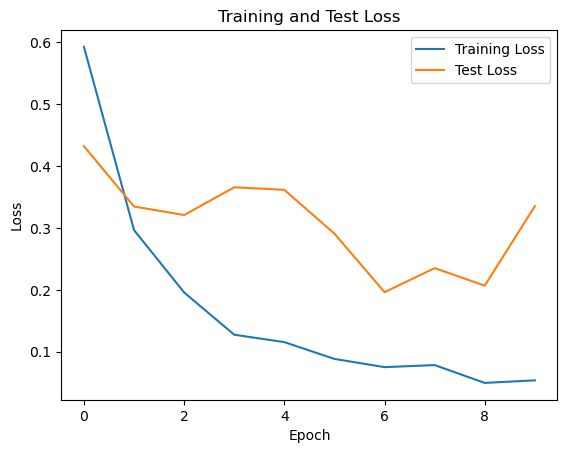

In [19]:
# Plot the learning curves
plt.plot(train_loss_values, label='Training Loss')
plt.plot(test_loss_values, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.show()

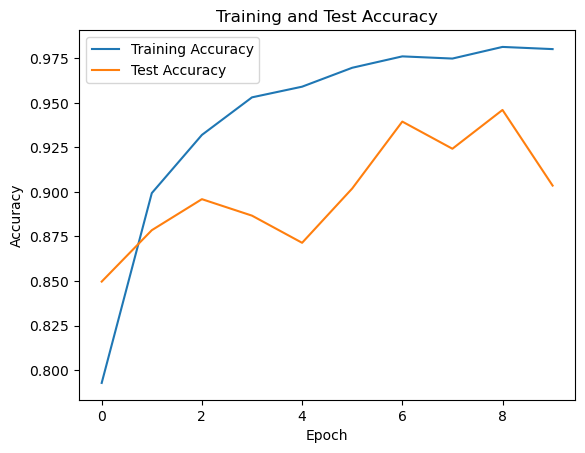

In [20]:
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.plot(test_accuracy_values, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

In [21]:
torch.save(classifier.state_dict(), "../models/resnet18.pth")

In [40]:
model = Classifier(num_classes)
model_path = '../models/resnet18.pth'
model.load_state_dict(torch.load(model_path, map_location=device))

# Move the model to the appropriate device (GPU or CPU)
model.to(device)

Classifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

In [41]:
# Evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 95.68%


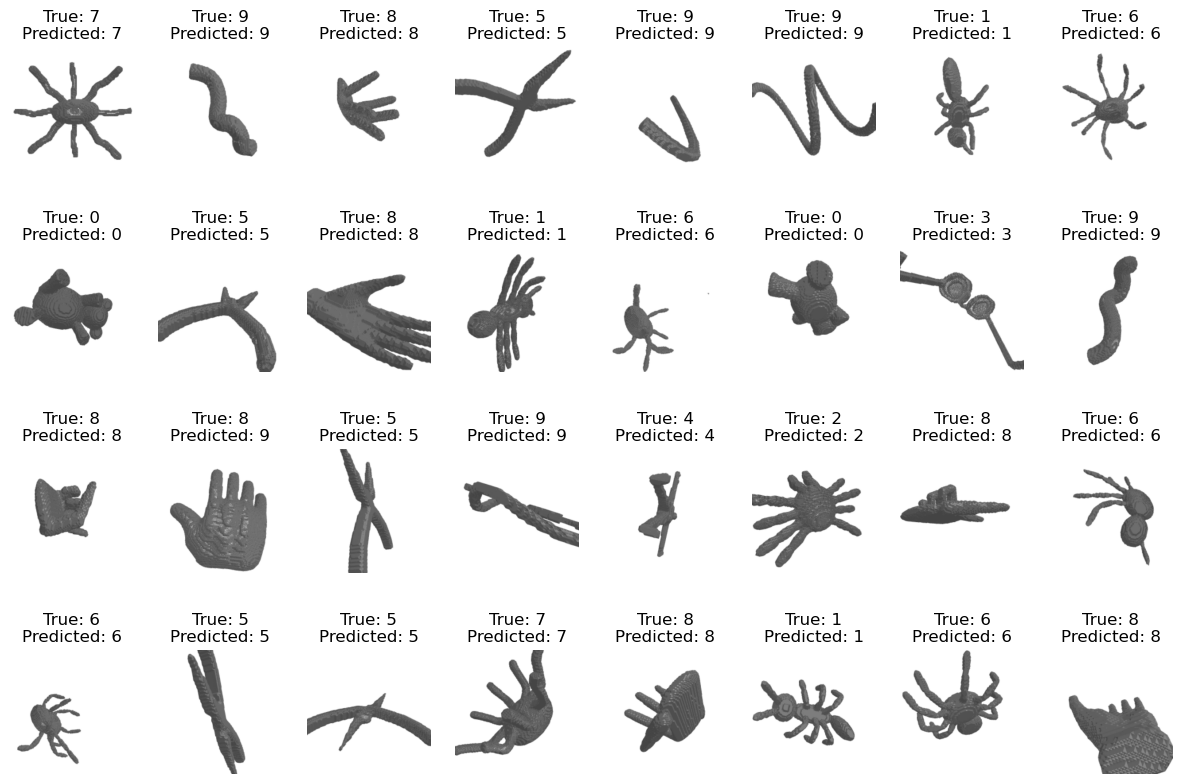

In [43]:
import matplotlib.pyplot as plt
import torchvision.utils

# Function to display all images in a batch with true and predicted labels
def display_batch_images_with_predictions(model, data_loader, batch_size=32):
    model.eval()  # Set the model to evaluation mode

    # Use torch.no_grad() to disable gradient computation during inference
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)

            # Make predictions for the entire batch
            outputs = model(images)
            _, predicted_labels = torch.max(outputs.data, 1)

            # Display all images in the batch with true and predicted labels
            plt.figure(figsize=(15, 10))
            for i in range(batch_size):
                plt.subplot(4, 8, i + 1)  # Adjust the subplot parameters as needed
                plt.imshow(images[i].cpu().permute(1, 2, 0))
                plt.title(f'True: {labels[i].cpu().item()}\nPredicted: {predicted_labels[i].cpu().item()}')
                plt.axis('off')

            plt.show()
            
            break  # Stop after the first batch to avoid long outputs

# Usage example
# Assuming you have 'classifier' as your trained model and 'train_loader' as your DataLoader for the training set
display_batch_images_with_predictions(model, test_loader)


In [45]:
test_loader.dataset.dataset.class_to_idx

{'teddyImage2D': 0,
 'antsImage2D': 1,
 'crabsImage2D': 2,
 'spectaclesImage2D': 3,
 'humansImage2D': 4,
 'pliersImage2D': 5,
 'spidersImage2D': 6,
 'octopusesImage2D': 7,
 'handsImage2D': 8,
 'snakesImage2D': 9}

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

num_classe = 10
model = Classifier(num_classe)

# Load the model weights
model_path = '../models/resnet18.pth'
model.load_state_dict(torch.load(model_path, map_location=device))

# Move the model to the appropriate device (GPU or CPU)
model.to(device)

root_dir = '../data'
# Create an instance of the McGillDataset class for Ply files
dataset = McGillDataset(root_dir, file_type='Ply')
train_dataset, test_dataset = split_dataset(dataset, test_size=0.2)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

dataset.class_to_idx

In [ ]:
import matplotlib.pyplot as plt
model.eval()  # Set the model to evaluation mode

print(dataset.class_to_idx)

with torch.no_grad():
    for sample in test_loader:
        model_3d = sample['path_3d_data_file']
        path_images = sample['path_2d_data_folder']
        labels = sample['label'].to(device)

        # Create a single figure with subplots
        plt.figure(figsize=(15, 8))

        # Display the first image in each folder in a subplot
        for i, (folder_path, label) in enumerate(zip(path_images, labels), 1):
            # Get the list of files in the folder
            image_files = os.listdir(folder_path)

            
            if image_files:  # Check if there are any files in the folder
                # Load the first image in the folder
                first_image_path = os.path.join(folder_path, image_files[0])
                first_image = Image.open(first_image_path).convert('RGB')  # Assuming images are RGB

                image_tensor = transform(first_image).unsqueeze(0).to(device)
                output = model(image_tensor)
                _, predicted_label = torch.max(output, 1)
          

                # Add a subplot
                plt.subplot(4, 8, i)
                plt.imshow(first_image)
                plt.title(f'True Label: {label.item()}\nPredicted: {predicted_label.item()}')
                #plt.title(f'True Label: {os.path.split(os.path.split(folder_path)[0])[1]}\nPredicted: {predicted_label.cpu().item()}')
                plt.axis('off')

        # Adjust layout for better visualization
        plt.tight_layout()
        plt.show()
        
        break

